# Clasificación de flores Iris

Ahora exploraremos la potencia de SVM en problemas de clasficación y de regresión con variables contínuas.

Como aprendimos a la hora de clasificar las flores Iris con los bosques aleatorios, las variables más importantes son la altura y la anchura de pétalo, por lo que nos basaremos en estas dos dimensiones para probar el SVM y poder hacer una representación visual del problema.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, datasets

In [3]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Vemos que el dataset de iris `sklearn` lo suministra como un array. Hacemos las transformaciones necesarias para poder trabajar de una manera más legible con el conjunto de datos. Nos quedamos con:

* Las dos primeras columnas del array, que son la longitud y anchura de pétalo
* Las clasificaciones de cada caso

In [4]:
X = iris.data[:,:2]
Y = iris.target

Aprovechamos para establecer los límites para los gráficos que queramos dibujar con estos datos.

* Le damos un margen de 1 al mínimo y al máximo
* Calculamos el parámetro `h` para establecer las proporciones

Creamos la parrilla de datos con `meshgrid` que se mueva entre los márgenes de los valores que calculamos como `x_min`, `x_max`, `y_min` e `y_max`.

In [5]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_plot = np.c_[xx.ravel(), yy.ravel()]

`x_plot` combina las `xx` con las `yy`, de manera que crea un array con todos los puntos que van a ser pintados (la parrilla de dibujo).

In [6]:
x_plot

array([[3.3  , 1.   ],
       [3.356, 1.   ],
       [3.412, 1.   ],
       ...,
       [8.732, 5.368],
       [8.788, 5.368],
       [8.844, 5.368]])

Ahora creamos el modelo con los siguientes parámetros:
* Separación lineal
* `decision_function_shape`: para que ajuste los datos lo mejor posible
* Hacemos la predicción con la parrilla de datos que habíamos establecido
* Cambiamos la dimensión de la predicción para que quede de la misma forma que `xx` y poderlo representar.

In [36]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

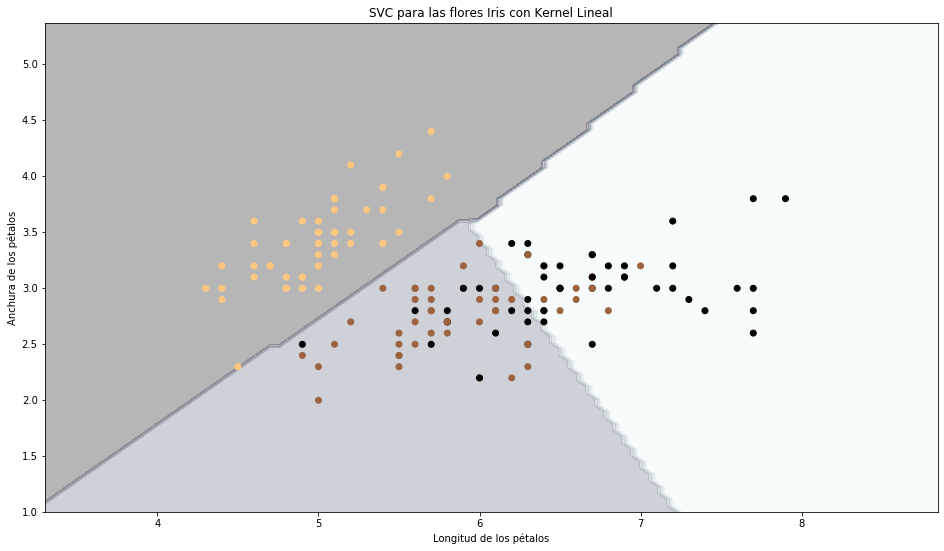

In [37]:
plt.figure(figsize=(16,9))

# Dibujamos las regiones en las que se dividieron los datos
plt.contourf(xx,yy,Ypred, cmap=plt.cm.bone, alpha=0.3)
# Añadimos los puntos clasificados
plt.scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.copper_r)

plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores Iris con Kernel Lineal")

plt.show()

Ahora probamos otro kernel diferente.

In [39]:
C = 1.0
svc = svm.SVC(kernel='rbf', gamma='auto', C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

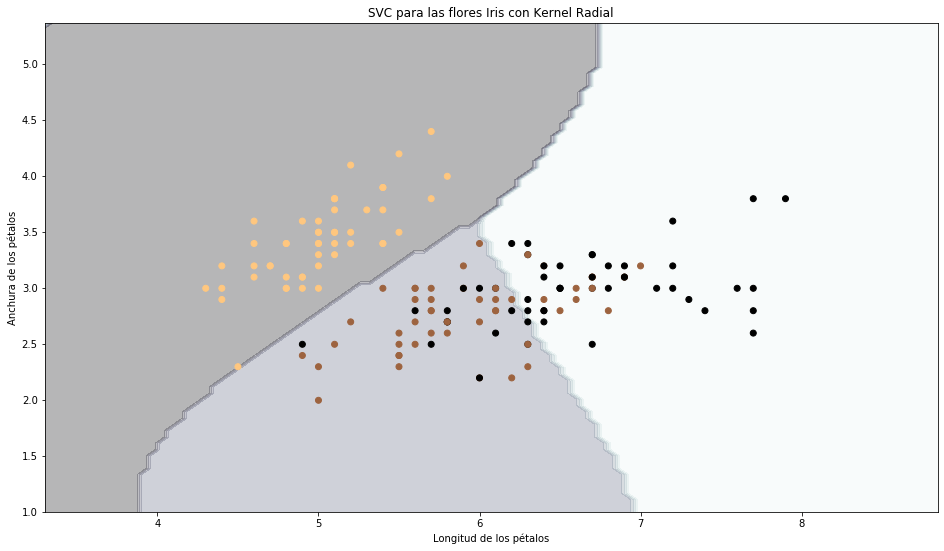

In [40]:
plt.figure(figsize=(16,9))

# Dibujamos las regiones en las que se dividieron los datos
plt.contourf(xx,yy,Ypred, cmap=plt.cm.bone, alpha=0.3)
# Añadimos los puntos clasificados
plt.scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.copper_r)

plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores Iris con Kernel Radial")

plt.show()

Podemos probar con otros Kernels para terminar de decidir cuál de ellos es el más acertado a la hora de clasificar. Por ejemplo, el kernel polinomial.

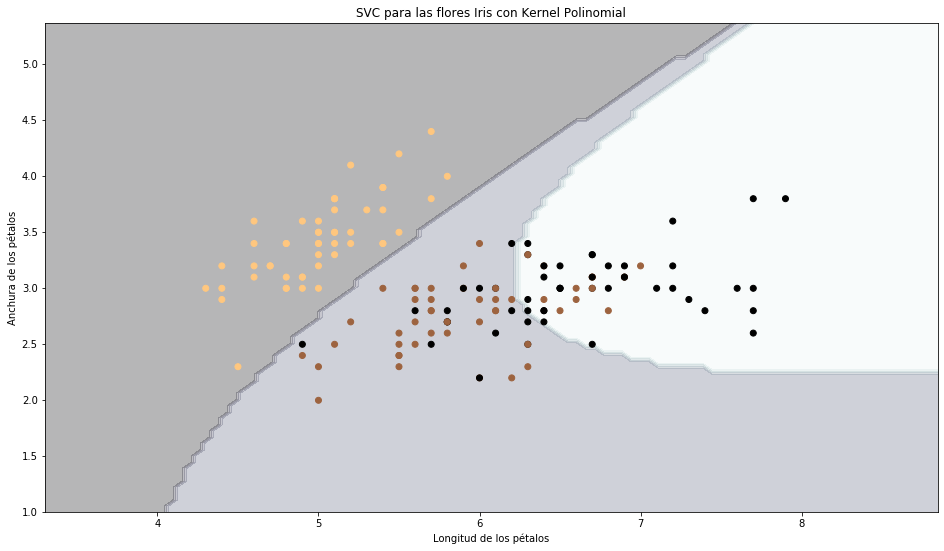

In [41]:
C = 1.0
svc = svm.SVC(kernel='poly', gamma='auto', C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))

# Dibujamos las regiones en las que se dividieron los datos
plt.contourf(xx,yy,Ypred, cmap=plt.cm.bone, alpha=0.3)
# Añadimos los puntos clasificados
plt.scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.copper_r)

plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores Iris con Kernel Polinomial")

plt.show()

Una vez hecho esto, se trataría de tomar el que consideremos más adecuado y mejorar sus hiperparámetros para lograr una clasificación aún más precisa, usando la técnica del grid search cross validation que vimos anteriormente.

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [22]:
X, Y = shuffle(X,Y, random_state=0)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [24]:
parameters = [
    {
        'kernel': ['rbf'],
        'gamma': [1e-4,1e-3,1e-2,0.1,0.2,0.5],
        'C':[1,10,100,1000]
    },
    {
        'kernel':['linear'],
        'C':[1,10,100,1000]
    }
]

In [25]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Vemos qué clasificador ha resultado mejor.

In [26]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Los resultados de la validación cruzada traen un montón de parámatros como veremos a continuación. Tomaremos algunos de ellos para evaluar el rendimiento de nuestro modelo.

Como las desviaciones estandar se suelen dar como un intervalo de confianza, multiplicaremos por 2 para tipificar (1,96 como intervalo redondeado hacia arriba).

In [29]:
clf.cv_results_

/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/carlosdavila/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/car

{'mean_fit_time': array([0.00190263, 0.00147667, 0.00101843, 0.00084929, 0.0012012 ,
        0.00072079, 0.00136557, 0.00077901, 0.00054755, 0.00050406,
        0.00049624, 0.00059381, 0.00072942, 0.00055046, 0.00051103,
        0.00057683, 0.00065465, 0.00081792, 0.0005486 , 0.00052323,
        0.00058441, 0.00126476, 0.00200686, 0.00207491, 0.00056996,
        0.00054803, 0.00097528, 0.00558853]),
 'std_fit_time': array([3.82060767e-04, 4.67176338e-04, 2.11492068e-04, 2.58282420e-04,
        6.20762766e-04, 1.25521475e-04, 8.67433891e-04, 4.24204477e-05,
        1.32493819e-05, 2.20566954e-05, 1.70722353e-05, 5.70787423e-05,
        8.09584682e-06, 1.83909607e-05, 2.72104859e-05, 2.46084935e-05,
        4.66300420e-05, 1.56139496e-04, 2.53514187e-05, 4.19772726e-05,
        2.40343903e-05, 4.33915248e-04, 9.25342781e-04, 6.86903968e-04,
        1.27533002e-04, 1.25937162e-04, 5.04844698e-04, 2.98424774e-03]),
 'mean_score_time': array([0.00076399, 0.00074272, 0.00043941, 0.00038328, 

In [30]:
means = clf.cv_results_['mean_test_score']
std = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']

for m, s, p in zip(means, std, params):
    print("%0.3f (+/-%0.3f) para %r"%(m, 2*s, p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.126) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.080) para {'C': 100, 'gamma'

Si nos fijamos en los resultados, varias de las combinaciones de parámetros cuentan con unos valores de los estadísticos que hemos impreso idénticos.

Una vez obtenidos los parámetros, el siguiente paso es usar el clasificador obtenido para llevar a cabo la predicción.

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print(classification_report(Y_test, y_pred, target_names=['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

   micro avg       0.79      0.79      0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



Vemos que:
* Con la setosa tenemos una precisión y eficacia máximas (`precision` y `recall`)
* La precisión y la eficacia de las demás clasificaciones son prácticamente complementarias la una de la otra
* El `f1-score` nos da una medida de la precisión del modelo usando un cociente entre los estadísticos anteriores
* El número de soportes vectoriales para cada clasificación no difiere demasiado.

Volvemos a graficar el modelo con los parámetros obtenidos.

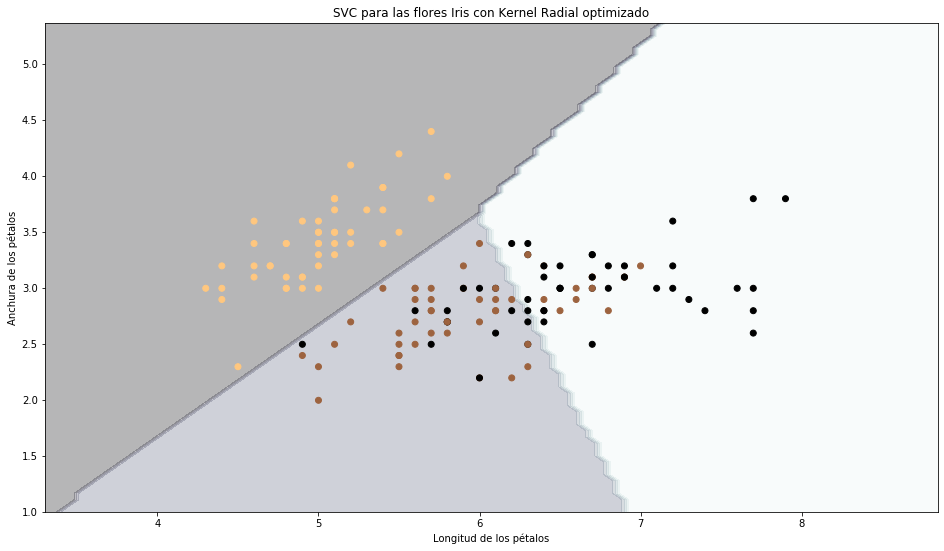

In [34]:
C = 10
svc = svm.SVC(kernel='rbf', gamma=0.01, C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(x_plot)
Ypred = Ypred.reshape(xx.shape)

plt.figure(figsize=(16,9))

# Dibujamos las regiones en las que se dividieron los datos
plt.contourf(xx,yy,Ypred, cmap=plt.cm.bone, alpha=0.3)
# Añadimos los puntos clasificados
plt.scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.copper_r)

plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(), xx.max())
plt.title("SVC para las flores Iris con Kernel Radial optimizado")

plt.show()

## Resumen del la clasificación con SVM sobre Iris

Una clave en el trabajo de Data Scientist será ser capaces de transmitir el por qué de las decisiones que vamos tomando.

Para ello puede resultar enormemente útil el uso de gráficos interactivos como los que hemos visto para ir jugando con los parámetros del modelo y transmitir este conocimiento a otros miembros del equipo de trabajo.

Esta idea la podemos aplicar a otro tipo de datasets, de modelos, etc. Tendremos que sacarle el partido que tiene de cara al trabajo con equipos interdisciplinares en los que puede haber colegas de profesión que quieran interactuar también con tu trabajo.

In [42]:
def svm_iris(C=0.1, kernel='rbf', gamma=0.01):
    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn import svm, datasets
    
    iris = datasets.load_iris()
    
    X = iris.data[:,:2]
    Y = iris.target
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    x_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC(kernel=kernel, gamma=gamma, C=C, decision_function_shape='ovr').fit(X,Y)
    Ypred = svc.predict(x_plot)
    Ypred = Ypred.reshape(xx.shape)

    plt.figure(figsize=(16,9))

    # Dibujamos las regiones en las que se dividieron los datos
    plt.contourf(xx,yy,Ypred, cmap=plt.cm.bone, alpha=0.3)
    # Añadimos los puntos clasificados
    plt.scatter(X[:,0],X[:,1], c=Y, cmap=plt.cm.copper_r)

    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.xlim(xx.min(), xx.max())
    plt.title("SVC para las flores Iris con Kernel "+kernel)

    plt.show()

In [43]:
from ipywidgets import interact, fixed

In [44]:
C = [0.01,0.1,1,10,100,1000]
gamma = [1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.5,0.99]
kernel = ['rbf','linear','sigmoid','poly']

interact(svm_iris, C=C, gamma=gamma, kernel=kernel)

interactive(children=(Dropdown(description='C', index=1, options=(0.01, 0.1, 1, 10, 100, 1000), value=0.1), Dr…

<function __main__.svm_iris(C=0.1, kernel='rbf', gamma=0.01)>